# Performance Technical Strategy

## Import

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Get data Reports

In [30]:


# URL ของ Google Sheets
url = "https://docs.google.com/spreadsheets/d/1M2J41NhgnGg0SxwIskfqQRSHmYGtRlT6ztNaQm64lsE/export?format=csv"

# อ่านไฟล์ CSV
df = pd.read_csv(
    'Reports - Technical Strategy.csv')

# แสดงข้อมูล
df

,Strategy,Time frame,Deposit,margin,Start,End,Duration,Exposure Time [%],Equity Final [$],Equity Peak [$],...,Win Rate [%],Best Trade [%],Worst Trade [%],Avg. Trade [%],Max. Trade Duration,Avg. Trade Duration,Profit Factor,Expectancy [%],SQN,_strategy
0,Simple moving average crossover,D1,10000,1/100,2007-01-01 0:00:00,2023-03-10 0:00:00,5912 days 00:00:00,0.694031,19998.067450,20016.35323,...,50.000000,1.298639,-1.168618,-0.020749,2 days 00:00:00,1 days 00:00:00,0.935641,-0.018847,-0.043339,SMA_crossover
1,Simple moving average crossover,H4,10000,1/100,2007-01-01 0:00:00,2023-03-10 16:00:00,5912 days 16:00:00,1.000924,9923.665121,10014.17234,...,50.931677,0.765704,-1.288562,-0.028091,2 days 12:00:00,0 days 05:00:00,0.816971,-0.027596,-1.459318,SMA_crossover
2,Simple moving average crossover,H1,10000,1/100,2007-01-01 0:00:00,2023-03-10 17:00:00,5912 days 17:00:00,0.955551,9757.242367,10000.77416,...,46.315789,0.498501,-0.513722,-0.030971,2 days 06:00:00,0 days 02:00:00,0.660422,-0.030831,-4.576014,SMA_crossover
3,Simple moving average crossover,M30,10000,1/100,2007-01-01 0:00:00,2023-03-10 17:30:00,5912 days 17:30:00,1.536594,9555.118201,10001.02322,...,47.063758,0.482738,-0.734314,-0.029608,3 days 05:00:00,0 days 01:51:00,0.624291,-0.029511,-7.187288,SMA_crossover
4,Short term breakout with RSI,D1,10000,1/100,2007-01-01 0:00:00,2023-03-10 0:00:00,5912 days 00:00:00,3.648622,9808.731901,10004.08130,...,42.483660,2.644459,-2.611217,-0.087668,2 days 00:00:00,1 days 00:00:00,0.774207,-0.084921,-1.586304,Breakout_RSI
5,Short term breakout with RSI,H4,10000,1/100,2007-01-01 0:00:00,2023-03-10 16:00:00,5912 days 16:00:00,4.877579,9487.827439,10004.85582,...,44.206549,0.980448,-1.425178,-0.058216,3 days 00:00:00,0 days 04:00:00,0.656965,-0.057748,-4.480931,Breakout_RSI
6,Short term breakout with RSI,H1,10000,1/100,2007-01-01 0:00:00,2023-03-10 17:00:00,5912 days 17:00:00,5.478082,9020.249482,10001.53820,...,47.533175,0.921731,-0.791587,-0.024955,3 days 01:00:00,0 days 02:00:00,0.704116,-0.024829,-8.512150,Breakout_RSI
7,Short term breakout with RSI,M30,10000,1/100,2007-01-01 0:00:00,2023-03-10 17:30:00,5912 days 17:30:00,5.958399,7974.441062,10001.59156,...,46.626486,0.528740,-0.583220,-0.025035,3 days 05:00:00,0 days 01:08:00,0.611987,-0.024966,-17.170174,Breakout_RSI
8,Inside bar,D1,10000,1/100,2007-01-01 0:00:00,2023-03-10 0:00:00,5912 days 00:00:00,1.744993,9877.137592,10017.67649,...,44.776119,1.143480,-1.074126,-0.117509,4 days 00:00:00,1 days 00:00:00,0.667051,-0.115705,-1.837531,Inside_Bar
9,Inside bar,H4,10000,1/100,2007-01-01 0:00:00,2023-03-10 16:00:00,5912 days 16:00:00,2.821836,9819.683965,10014.65980,...,50.097466,0.566989,-1.230202,-0.027383,2 days 20:00:00,0 days 02:00:00,0.809830,-0.027007,-2.146625,Inside_Bar


### Group by Name strategy

In [6]:
data = df.copy()

In [7]:
strategy_name = data.groupby('Strategy' , sort=False)

In [8]:
strategy_name

In [9]:
strategies = []
for group_name, group_data in strategy_name:
    strategies.append(group_name)
   

In [10]:
strategies

['Simple moving average crossover',
 'Short term breakout with RSI',
 'Inside bar',
 'Long bar with small wicks',
 'Long bar with small wicks Trailing SL',
 'Bolinger bands',
 'London breakout',
 'Momentum',
 'Peak levels',
 'Martingale',
 'MACD',
 'Stochastic Oscilator',
 'Pivot Point']

## Win Rate [%]

In [ ]:
df['Win Rate [%]'] = df['Win Rate [%]'].fillna(0).astype(int)

In [11]:
win_rate_h4 = df.loc[df['Time frame'] == 'H4', 'Win Rate [%]']
win_rate_h1 = df.loc[df['Time frame'] == 'H1', 'Win Rate [%]']
win_rate_d1 = df.loc[df['Time frame'] == 'D1', 'Win Rate [%]']
win_rate_m30 = df.loc[df['Time frame'] == 'M30', 'Win Rate [%]']

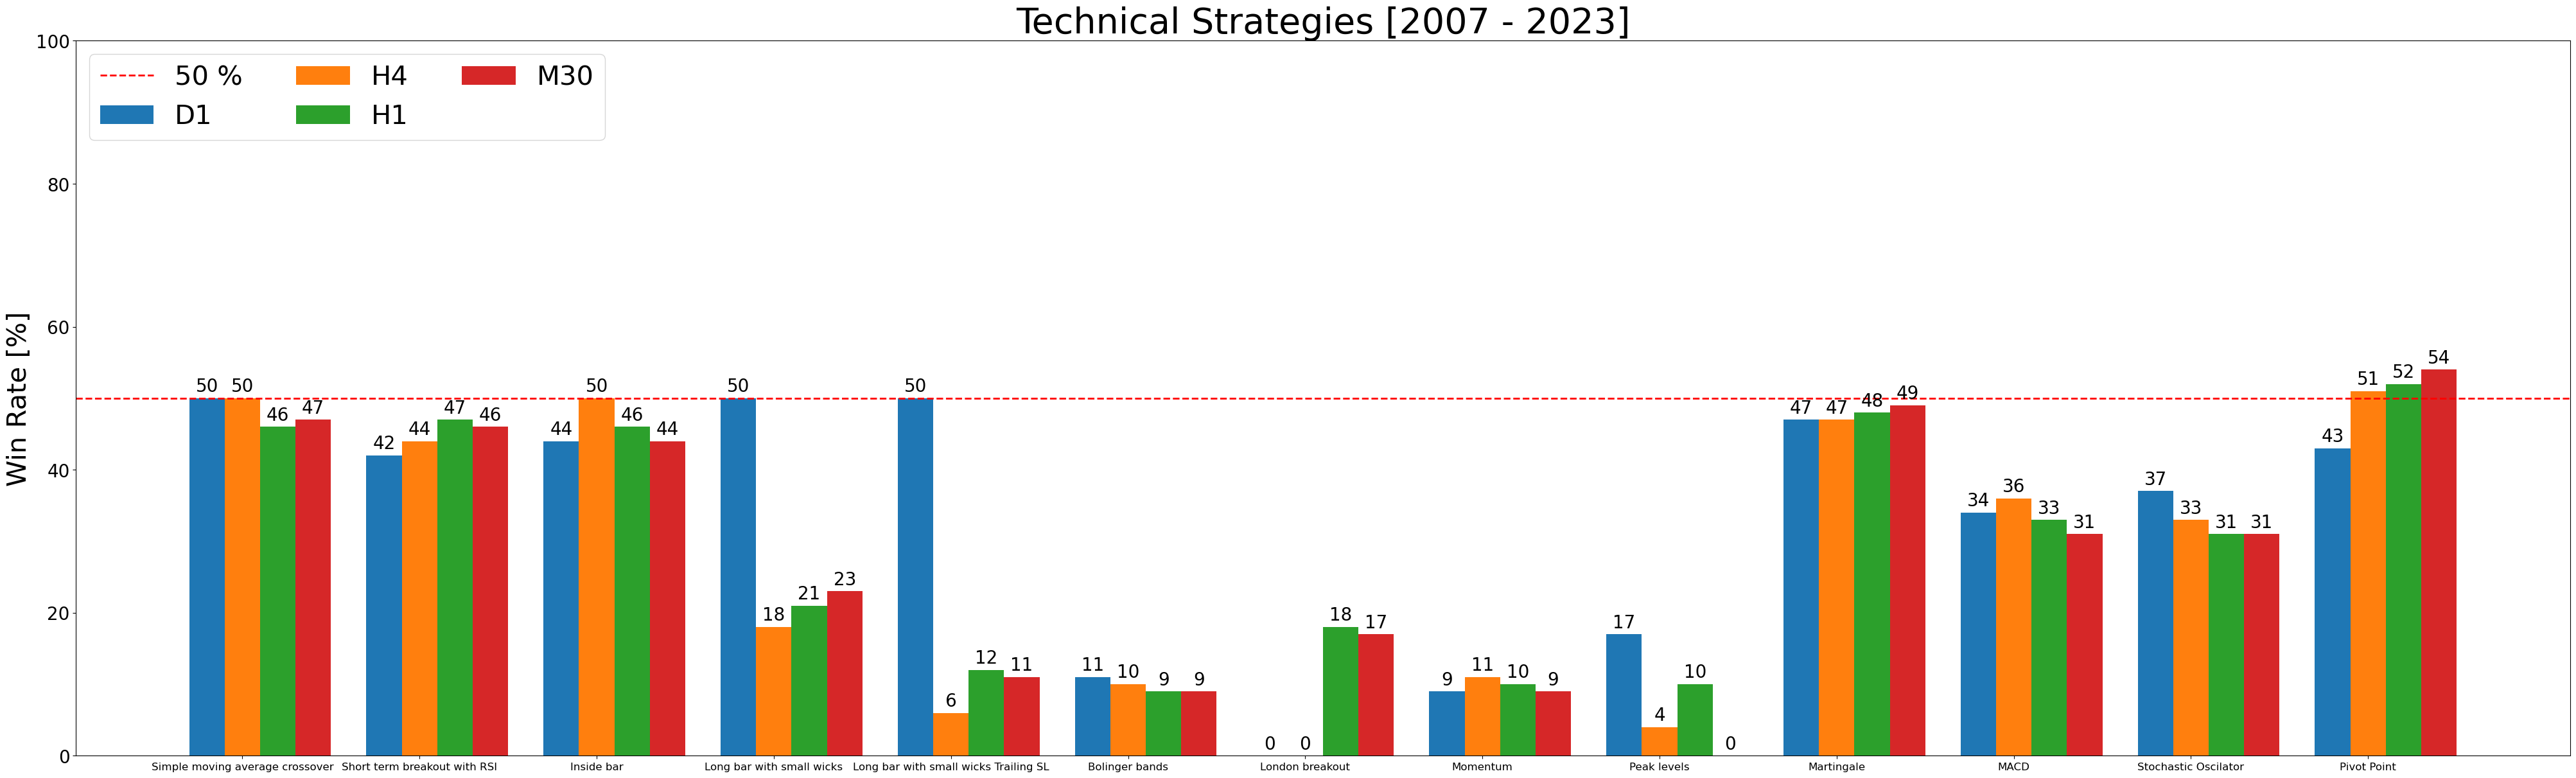

In [16]:
# original = np.array(df['Strategy'])
# strategies = np.unique(original)
# strategies_Name = ['SMA', 'RSI', 'Inside Bar', 'PinBar', 'PinBar SL', 'Bolinger bands', 'London breakout', 'Peak levels', 'Martingale', 'MACD', 'STO', 'Pivot Point']
x = np.arange(len(strategies))
timeframe = {
    'D1': win_rate_d1,
    'H4': win_rate_h4,
    'H1': win_rate_h1,
    'M30': win_rate_m30,
}
width = 0.2  # the width of the bars
multiplier = 0


fig, ax = plt.subplots(layout='constrained' , figsize=(40,12))

for TF, measurement in timeframe.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement , width, label= TF )
    ax.bar_label(rects, padding=3, fontsize=20)
    multiplier += 1


# Add horizontal line at y=50
ax.axhline(y=50, color='r', linestyle='--', linewidth=2, label='50 %')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Technical Strategies [2007 - 2023]', fontsize=40)
ax.set_ylabel('Win Rate [%]', fontsize=30)
ax.set_xticks(x + width, strategies, fontsize=12 )
ax.legend(loc='upper left', ncols=3, fontsize=30)
# Set y-axis tick label fontsize here
ax.tick_params(axis='y', labelsize= 20)
ax.set_ylim(0, 100)

plt.show()
    

## Profit Factor

In [31]:
df['Profit Factor'] = df['Profit Factor'].fillna(0).round(2)

In [32]:
Profit_Factor_h4 = df.loc[df['Time frame'] == 'H4', 'Profit Factor']
Profit_Factor_h1 = df.loc[df['Time frame'] == 'H1', 'Profit Factor']
Profit_Factor_d1 = df.loc[df['Time frame'] == 'D1', 'Profit Factor']
Profit_Factor_m30 = df.loc[df['Time frame'] == 'M30', 'Profit Factor']

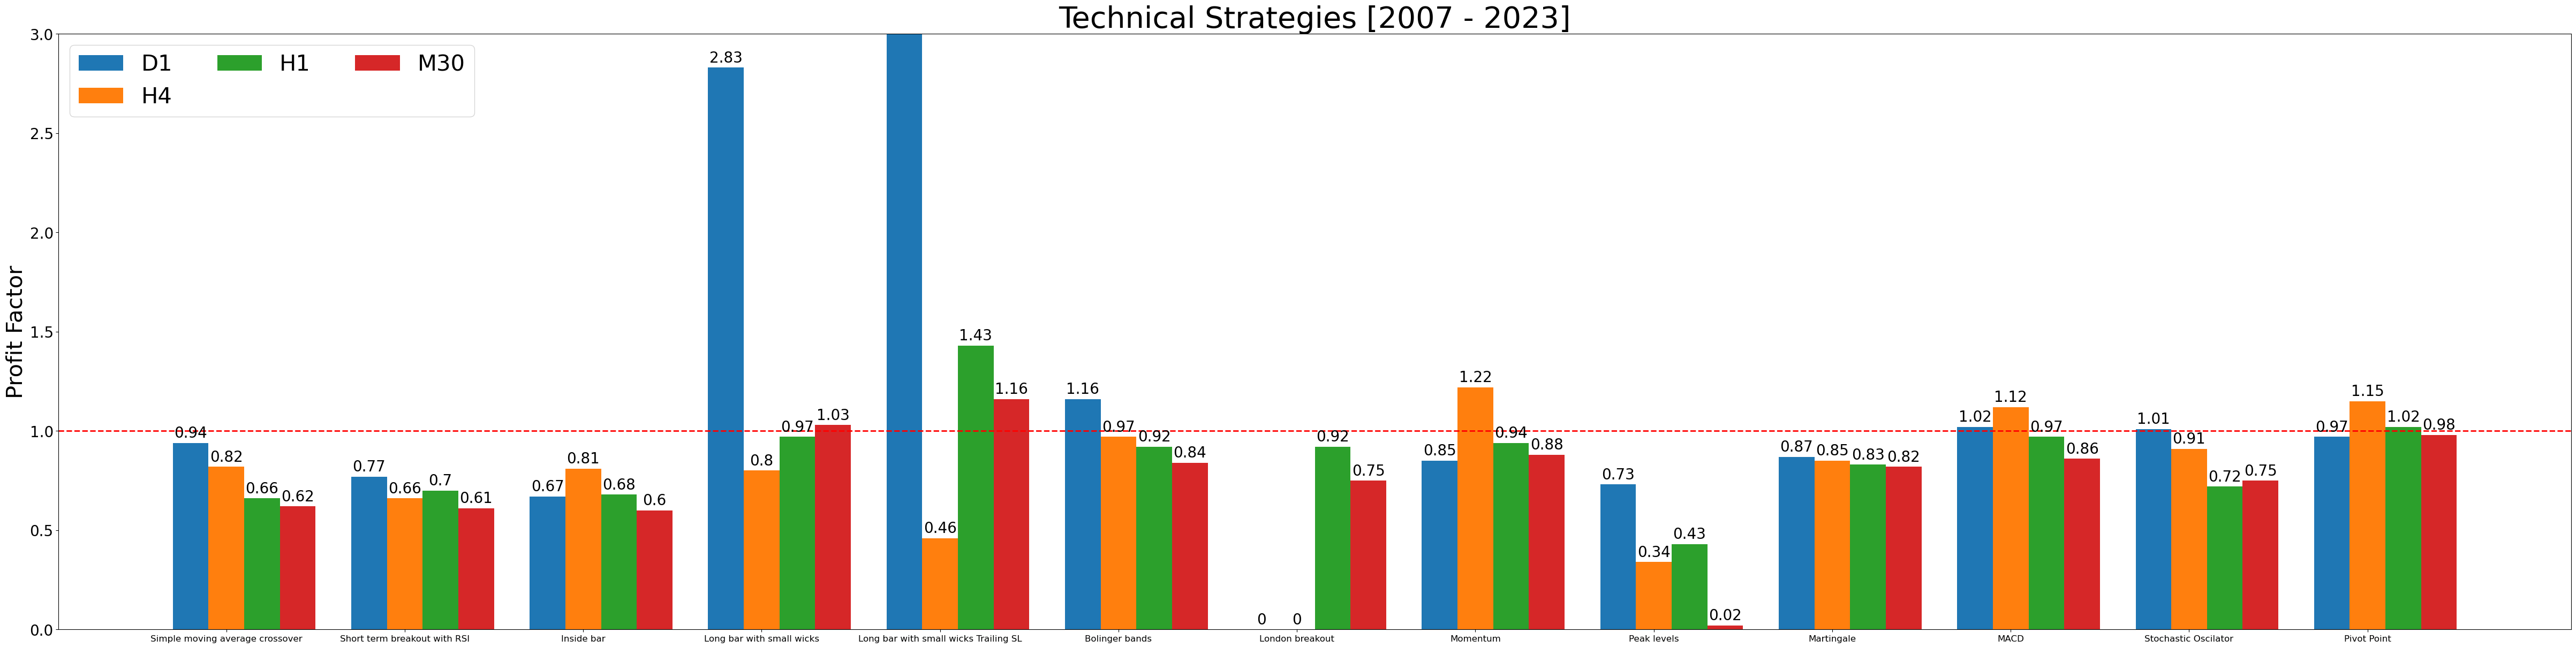

In [35]:
# original = np.array(df['Strategy'])
# strategies = np.unique(original)
# strategies_Name = ['SMA', 'RSI', 'Inside Bar', 'PinBar', 'PinBar SL', 'Bolinger bands', 'London breakout', 'Peak levels', 'Martingale', 'MACD', 'STO', 'Pivot Point']
x = np.arange(len(strategies))
timeframe = {
    'D1': Profit_Factor_d1,
    'H4': Profit_Factor_h4,
    'H1': Profit_Factor_h1,
    'M30': Profit_Factor_m30,
}
width = 0.2  # the width of the bars
multiplier = 0


fig, ax = plt.subplots(layout='constrained' , figsize=(48,12))

for TF, measurement in timeframe.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement , width, label= TF )
    ax.bar_label(rects, padding=3, fontsize=20)
    multiplier += 1


# Add horizontal line at y=50
ax.axhline(y=1, color='r', linestyle='--', linewidth=2)
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Technical Strategies [2007 - 2023]', fontsize=40)
ax.set_ylabel('Profit Factor', fontsize=30)
ax.set_xticks(x + width, strategies, fontsize=12 )
ax.legend(loc='upper left', ncols=3, fontsize=30)
# Set y-axis tick label fontsize here
ax.tick_params(axis='y', labelsize= 20)
ax.set_ylim(0, 3)

plt.show()
    

## Sharpe Ratio

In [36]:
df['Sharpe Ratio'] = df['Sharpe Ratio'].fillna(0).round(2)

In [37]:
Sharpe_Ratio_h4 = df.loc[df['Time frame'] == 'H4', 'Sharpe Ratio']
Sharpe_Ratio_h1 = df.loc[df['Time frame'] == 'H1', 'Sharpe Ratio']
Sharpe_Ratio_d1 = df.loc[df['Time frame'] == 'D1', 'Sharpe Ratio']
Sharpe_Ratio_m30 = df.loc[df['Time frame'] == 'M30', 'Sharpe Ratio']

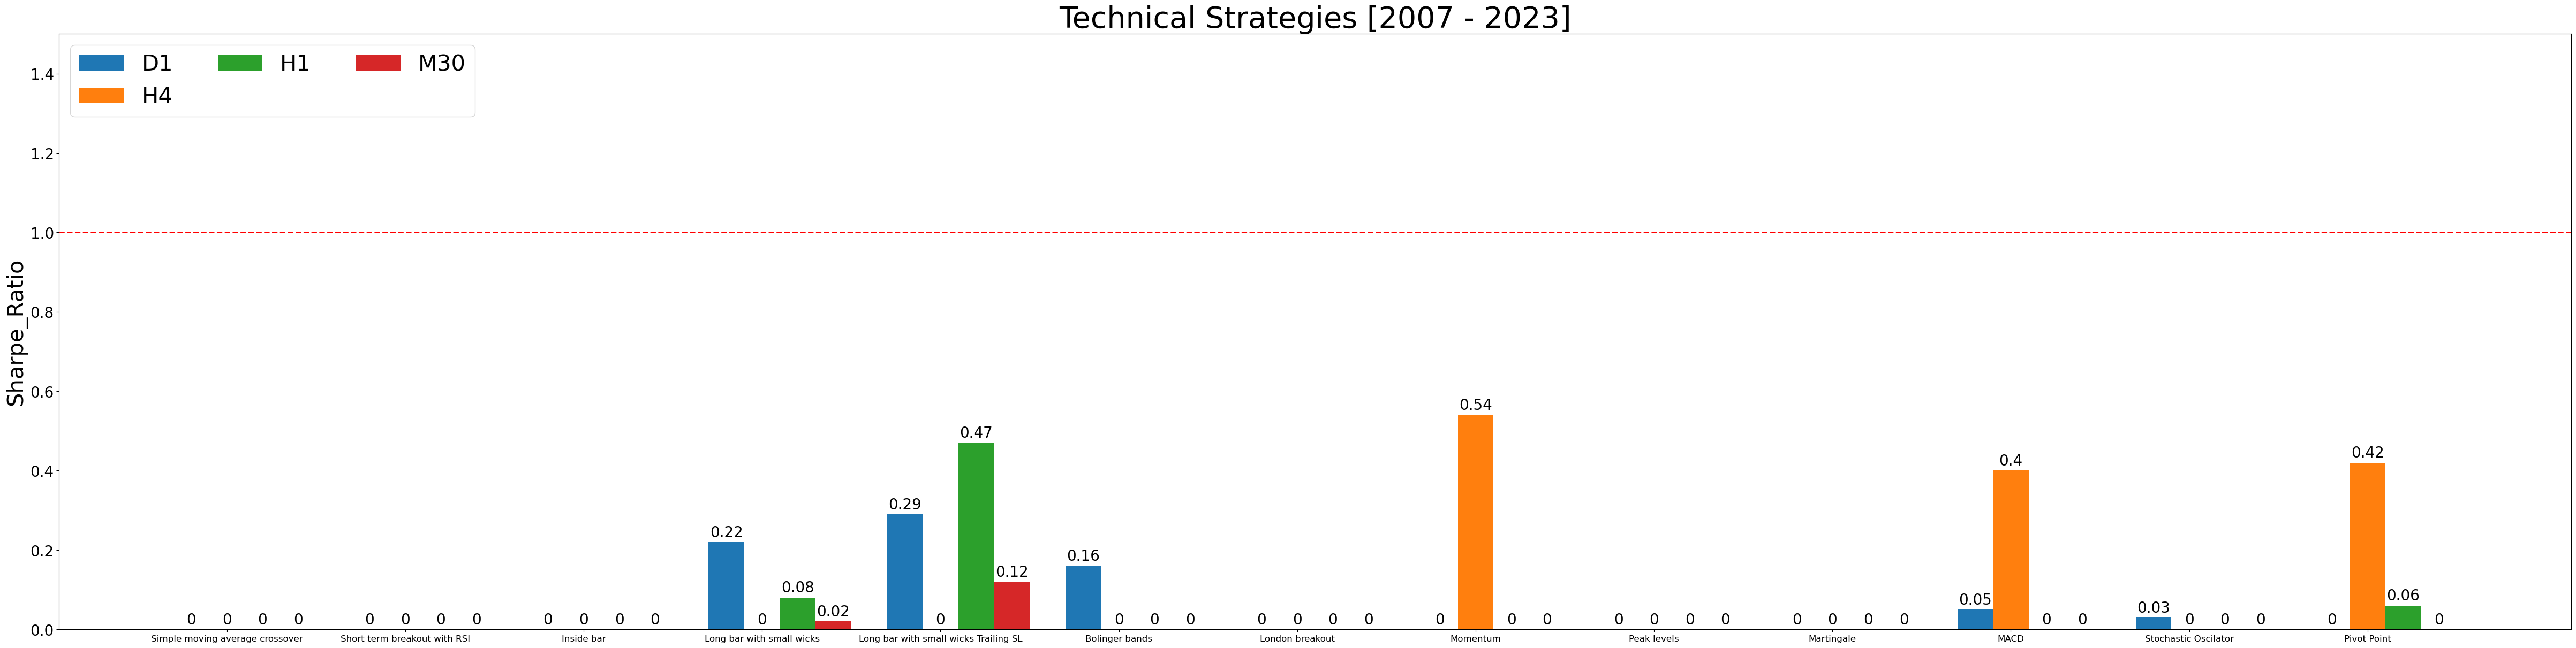

In [38]:
# original = np.array(df['Strategy'])
# strategies = np.unique(original)
# strategies_Name = ['SMA', 'RSI', 'Inside Bar', 'PinBar', 'PinBar SL', 'Bolinger bands', 'London breakout', 'Peak levels', 'Martingale', 'MACD', 'STO', 'Pivot Point']
x = np.arange(len(strategies))
timeframe = {
    'D1': Sharpe_Ratio_d1,
    'H4': Sharpe_Ratio_h4,
    'H1': Sharpe_Ratio_h1,
    'M30': Sharpe_Ratio_m30,
}
width = 0.2  # the width of the bars
multiplier = 0


fig, ax = plt.subplots(layout='constrained' , figsize=(48,12))

for TF, measurement in timeframe.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement , width, label= TF )
    ax.bar_label(rects, padding=3, fontsize=20)
    multiplier += 1


# Add horizontal line at y=50
ax.axhline(y=1, color='r', linestyle='--', linewidth=2)
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Technical Strategies [2007 - 2023]', fontsize=40)
ax.set_ylabel('Sharpe_Ratio', fontsize=30)
ax.set_xticks(x + width, strategies, fontsize=12 )
ax.legend(loc='upper left', ncols=3, fontsize=30)
# Set y-axis tick label fontsize here
ax.tick_params(axis='y', labelsize= 20)
ax.set_ylim(0, 1.5)

plt.show()
    

## Sortino Ratio

In [39]:
df['Sortino Ratio'] = df['Sortino Ratio'].fillna(0).round(2)

In [40]:
Sortino_Ratio_h4 = df.loc[df['Time frame'] == 'H4', 'Sortino Ratio']
Sortino_Ratio_h1 = df.loc[df['Time frame'] == 'H1', 'Sortino Ratio']
Sortino_Ratio_d1 = df.loc[df['Time frame'] == 'D1', 'Sortino Ratio']
Sortino_Ratio_m30 = df.loc[df['Time frame'] == 'M30', 'Sortino Ratio']

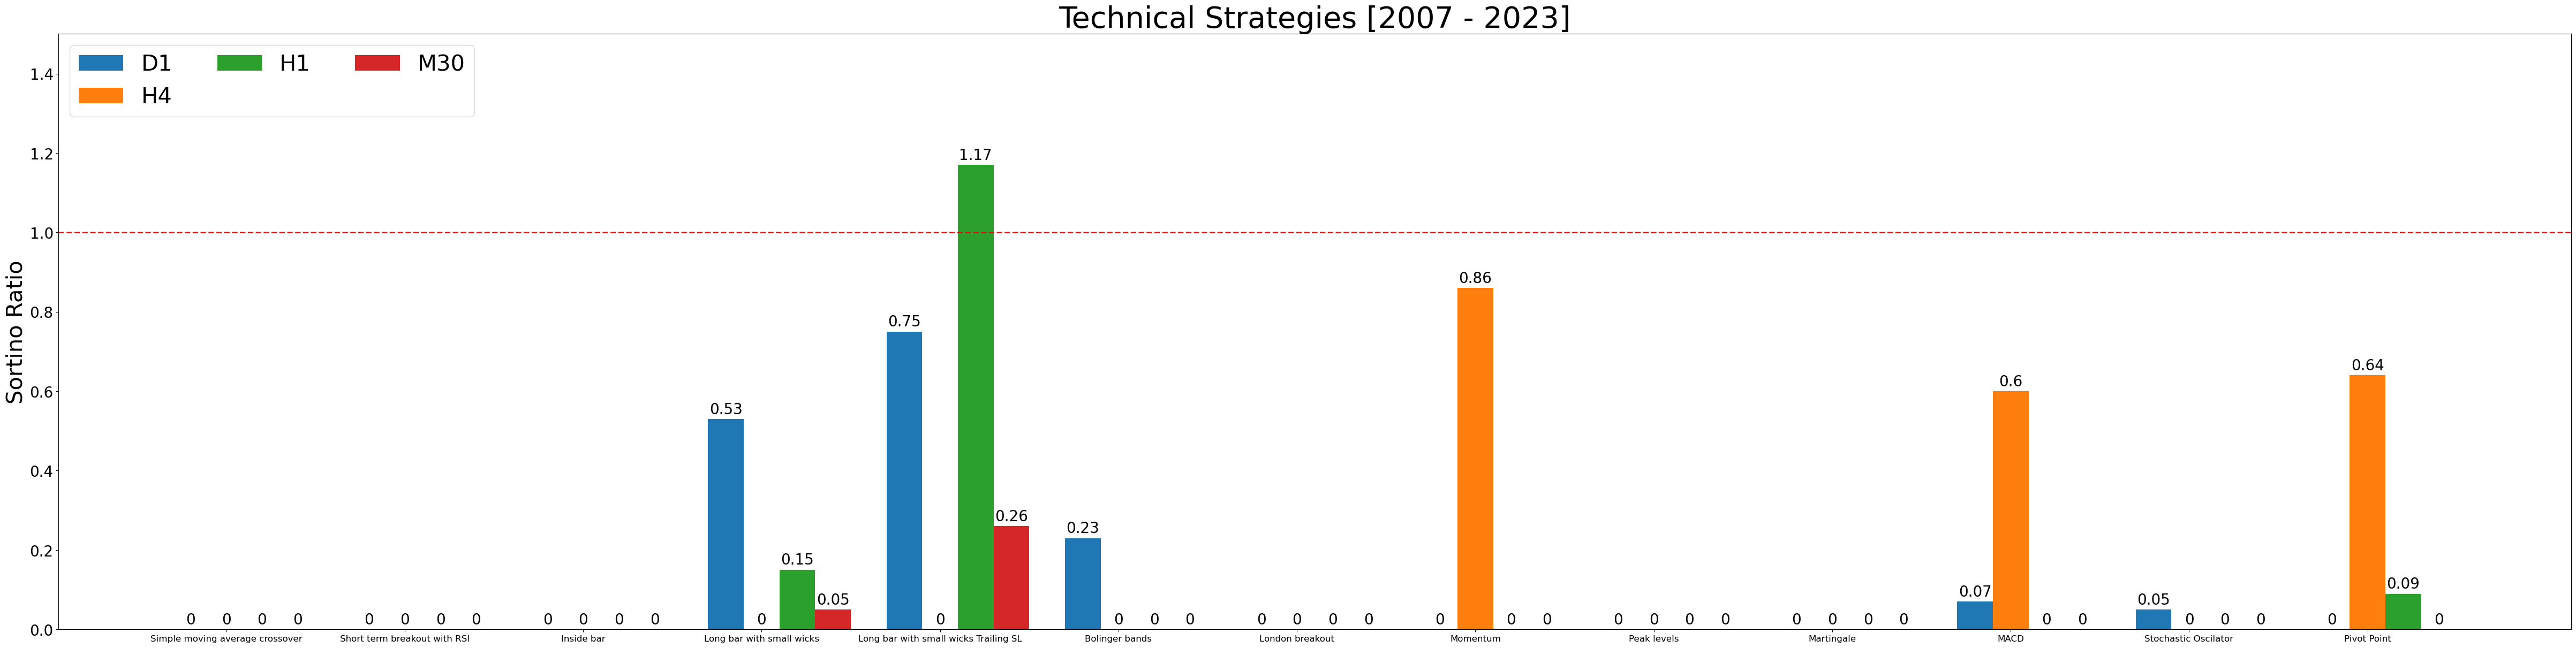

In [41]:
# original = np.array(df['Strategy'])
# strategies = np.unique(original)
# strategies_Name = ['SMA', 'RSI', 'Inside Bar', 'PinBar', 'PinBar SL', 'Bolinger bands', 'London breakout', 'Peak levels', 'Martingale', 'MACD', 'STO', 'Pivot Point']
x = np.arange(len(strategies))
timeframe = {
    'D1': Sortino_Ratio_d1,
    'H4': Sortino_Ratio_h4,
    'H1': Sortino_Ratio_h1,
    'M30': Sortino_Ratio_m30,
}
width = 0.2  # the width of the bars
multiplier = 0


fig, ax = plt.subplots(layout='constrained' , figsize=(48,12))

for TF, measurement in timeframe.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement , width, label= TF )
    ax.bar_label(rects, padding=3, fontsize=20)
    multiplier += 1


# Add horizontal line at y=50
ax.axhline(y=1, color='r', linestyle='--', linewidth=2)
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Technical Strategies [2007 - 2023]', fontsize=40)
ax.set_ylabel('Sortino Ratio', fontsize=30)
ax.set_xticks(x + width, strategies, fontsize=12 )
ax.legend(loc='upper left', ncols=3, fontsize=30)
# Set y-axis tick label fontsize here
ax.tick_params(axis='y', labelsize= 20)
ax.set_ylim(0, 1.5)

plt.show()
    

## Max. Drawdown [%]

In [43]:
df['Max. Drawdown [%]'] = df['Max. Drawdown [%]'].fillna(0).round(2)

In [44]:
Max_Drawdown_h4 = df.loc[df['Time frame'] == 'H4', 'Max. Drawdown [%]']
Max_Drawdown_h1 = df.loc[df['Time frame'] == 'H1', 'Max. Drawdown [%]']
Max_Drawdown_d1 = df.loc[df['Time frame'] == 'D1', 'Max. Drawdown [%]']
Max_Drawdown_m30 = df.loc[df['Time frame'] == 'M30', 'Max. Drawdown [%]']

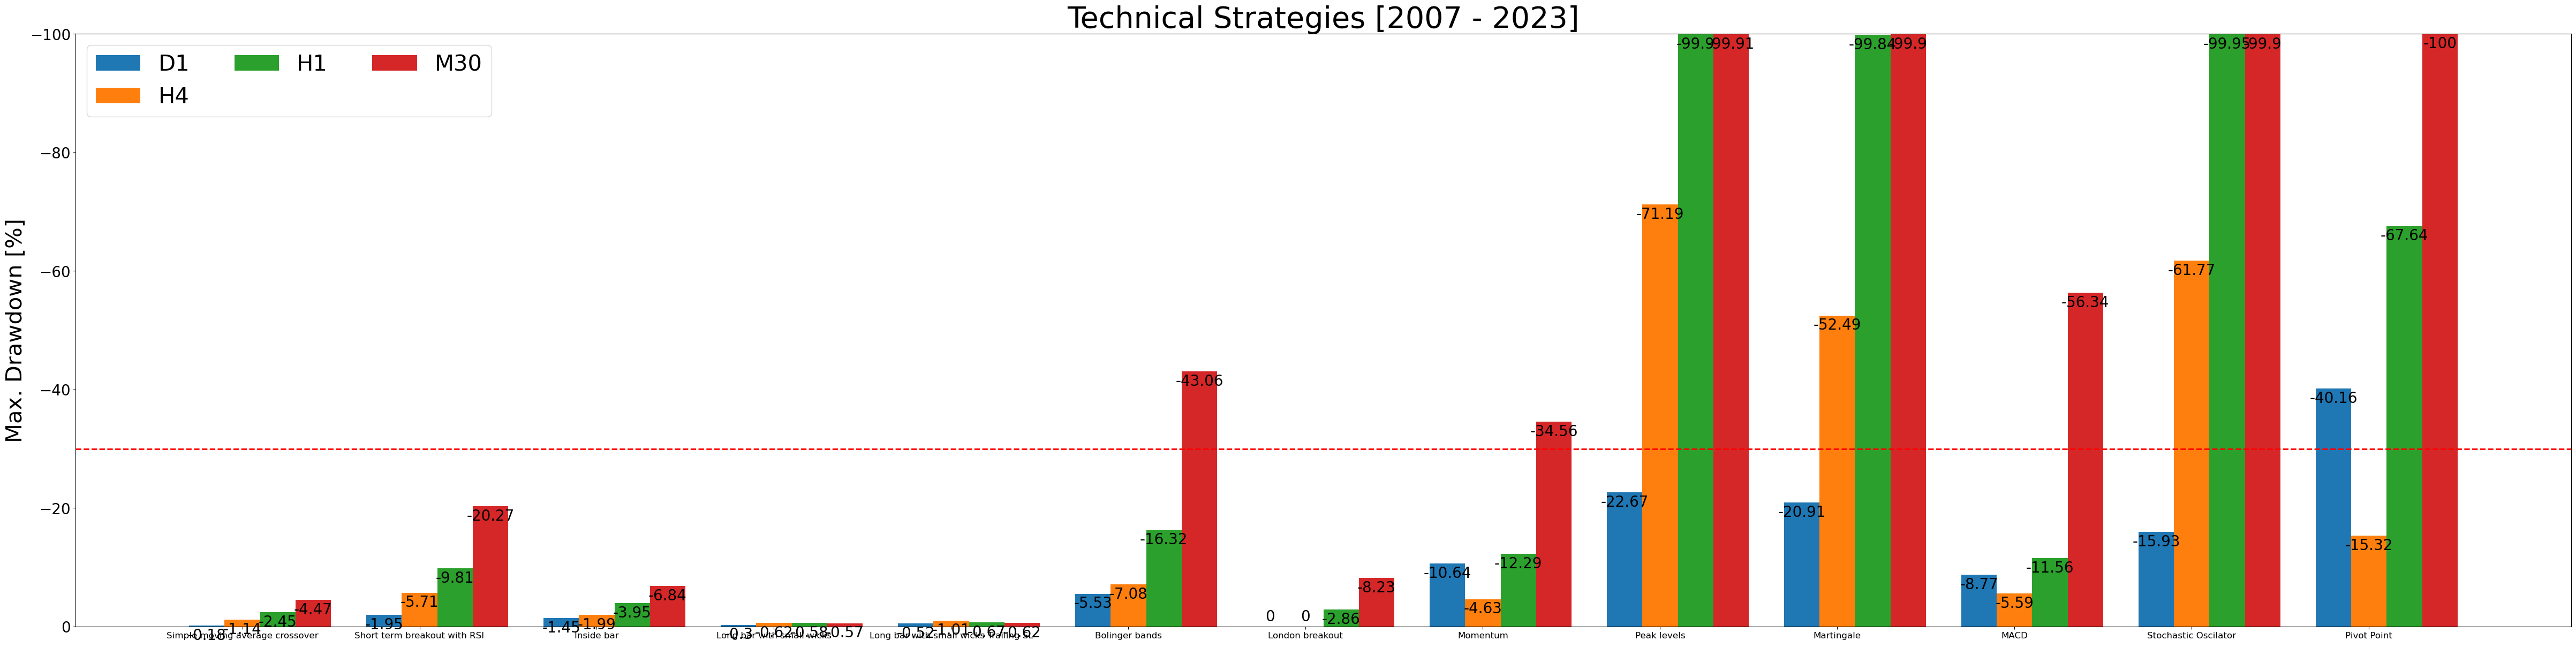

In [46]:
# original = np.array(df['Strategy'])
# strategies = np.unique(original)
# strategies_Name = ['SMA', 'RSI', 'Inside Bar', 'PinBar', 'PinBar SL', 'Bolinger bands', 'London breakout', 'Peak levels', 'Martingale', 'MACD', 'STO', 'Pivot Point']
x = np.arange(len(strategies))
timeframe = {
    'D1': Max_Drawdown_d1,
    'H4': Max_Drawdown_h4,
    'H1': Max_Drawdown_h1,
    'M30': Max_Drawdown_m30,
}
width = 0.2  # the width of the bars
multiplier = 0


fig, ax = plt.subplots(layout='constrained' , figsize=(48,12))

for TF, measurement in timeframe.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement , width, label= TF )
    ax.bar_label(rects, padding=3, fontsize=20)
    multiplier += 1


# Add horizontal line at y=50
ax.axhline(y=-30, color='r', linestyle='--', linewidth=2)
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Technical Strategies [2007 - 2023]', fontsize=40)
ax.set_ylabel('Max. Drawdown [%]', fontsize=30)
ax.set_xticks(x + width, strategies, fontsize=12 )
ax.legend(loc='upper left', ncols=3, fontsize=30)
# Set y-axis tick label fontsize here
ax.tick_params(axis='y', labelsize= 20)
ax.set_ylim(0, -100)

plt.show()
    